# Final project for CSCA5622

### Project Topic and Goal:

**Project Topic:**
This project focuses on the application of supervised machine learning techniques to diagnose breast cancer based on a dataset of patient characteristics. The primary task is a **binary classification problem**, where the goal is to predict whether a tumor is malignant or benign. The project utilizes various supervised learning algorithms, including Logistic Regression, Decision Tree, Random Forest, and Support Vector Machine (SVM), to develop and compare predictive models.

**Project Goal:**
The main objective of this project is to accurately classify breast cancer tumors as either malignant or benign using patient data. This is crucial for early detection and effective treatment, which can significantly improve patient outcomes. By exploring different machine learning models, the project aims to identify the most effective algorithm for this classification task, providing insights into model performance, strengths, and limitations. Additionally, this project seeks to understand the factors that contribute most significantly to the model's decision-making process, which could help medical professionals prioritize certain patient features during diagnosis.

### Data

**Data Source:**
The dataset used in this project is sourced from Kaggle, specifically from the "Breast Cancer Wisconsin (Diagnostic) Data Set". This dataset is publicly available and widely used for research and educational purposes. It provides a comprehensive set of features derived from digitized images of fine needle aspirate (FNA) of breast masses. The dataset can be accessed through the following link: [Breast Cancer Wisconsin (Diagnostic) Data Set on Kaggle](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data).

**Data Description:**

The dataset contains **569 samples (rows)** and **33 features (columns)**, including the target variable `diagnosis`, which indicates whether the tumor is malignant (M) or benign (B). The features are numerical values computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. These features describe the characteristics of the cell nuclei present in the image. Here’s a detailed description:

- **Target Variable:**
  - `diagnosis`: The target variable indicating the diagnosis of the breast mass. It is a categorical variable with two possible values:
    - `M`: Malignant (indicating the presence of cancer)
    - `B`: Benign (indicating non-cancerous)

- **Features:**
  - The dataset includes 30 numeric features, which are further grouped into three categories based on the type of measurement:
    1. **Mean Values:** These are the mean values of the features computed from each image, such as `radius_mean`, `texture_mean`, `perimeter_mean`, etc.
    2. **Standard Error:** The standard error of each feature, such as `radius_se`, `texture_se`, `perimeter_se`, etc.
    3. **Worst Values:** The worst or largest value of each feature across the image, such as `radius_worst`, `texture_worst`, `perimeter_worst`, etc.

- **Specific Feature Examples:**
  - **Radius:** The average size of the nucleus (mean, SE, worst).
  - **Texture:** Variation in gray-scale values (mean, SE, worst).
  - **Perimeter:** The perimeter of the nucleus (mean, SE, worst).
  - **Area:** The area of the nucleus (mean, SE, worst).
  - **Smoothness:** The smoothness of the cell (mean, SE, worst).
  - **Compactness:** How compact the cell is (mean, SE, worst).
  - **Concavity:** The severity of concave portions of the contour (mean, SE, worst).
  - **Concave Points:** The number of concave portions of the contour (mean, SE, worst).
  - **Symmetry:** The symmetry of the cell (mean, SE, worst).
  - **Fractal Dimension:** The fractal dimension of the cell (mean, SE, worst).

- **File Size:** The dataset is relatively small, with a file size of approximately 46 KB, making it easy to handle and process in a typical machine learning workflow.

### Data Import


1. Import Dataset
The dataset is fron Kaggle. 
The dataset contains 569 entries and 33 columns. Here are some key observations:

2.	The dataset includes a column labeled diagnosis, which seems to be the target variable indicating whether a patient has breast cancer or not.
3.	The remaining columns represent various features that could be used to predict the diagnosis, such as radius_mean, texture_mean, perimeter_mean, etc.
4.	There’s a column named Unnamed: 32 that contains only null values, which can be removed.
5.	The id column seems to be an identifier and may not be useful for prediction purposes.


In [12]:
import pandas as pd

# Load the dataset
file_path = 'data/data.csv'
data = pd.read_csv(file_path)

# Display the first few rows and basic info of the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

(None,
          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
 0    842302         M        17.99         10.38          122.80     1001.0   
 1    842517         M        20.57         17.77          132.90     1326.0   
 2  84300903         M        19.69         21.25          130.00     1203.0   
 3  84348301         M        11.42         20.38           77.58      386.1   
 4  84358402         M        20.29         14.34          135.10     1297.0   
 
    smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
 0          0.11840           0.27760          0.3001              0.14710   
 1          0.08474           0.07864          0.0869              0.07017   
 2          0.10960           0.15990          0.1974              0.12790   
 3          0.14250           0.28390          0.2414              0.10520   
 4          0.10030           0.13280          0.1980              0.10430   
 
    ...  texture_worst  perimeter_worst  

### Data Cleaning

**1. Dropping Unnecessary Columns:**
   - The `id` column was dropped as it serves only as a unique identifier for each patient and does not provide any predictive value for the diagnosis of breast cancer.
   - The `Unnamed: 32` column, which contained only null values, was also removed. This column appeared to be an artifact of data processing, and its removal ensures that the dataset is clean and free from irrelevant or redundant data.

**2. Handling Missing Values:**
   - The dataset was inspected for missing values, and the only column with missing data was `Unnamed: 32`, which was entirely null and therefore dropped. No imputation was necessary as the rest of the dataset was complete, allowing us to proceed with a full feature set.

**3. Checking for Outliers:**
   - Box plots were generated for key features to visually inspect for outliers. It was found that the dataset had a few outliers, particularly in the `area_mean` feature. These outliers were carefully considered; however, they were retained in the dataset as they could represent significant cases (e.g., extreme tumor sizes) that are relevant to the diagnosis.

**4. Data Transformation (if applicable):**
   - Some features were transformed to improve model performance. For example, log transformations were applied to features with skewed distributions, such as `perimeter_mean` and `area_mean`, to normalize their distributions.

**Summary of Data Cleaning:**
   - The dataset is now free of irrelevant columns and missing data, and has been carefully examined for outliers. This cleaned dataset is ready for exploratory data analysis and model training, ensuring that the models will be trained on high-quality data.

In [13]:
# Drop the 'Unnamed: 32' and 'id' columns
data_cleaned = data.drop(columns=['Unnamed: 32', 'id'])

# Check for any missing values
missing_values = data_cleaned.isnull().sum()

# Display the cleaned dataset and check for missing values
data_cleaned.head(), missing_values.sum()

print(f"Total missing values in the dataset: {missing_values.sum()}")




Total missing values in the dataset: 0


## Exploratory Data Analysis (EDA)


1.	Visualizing the distribution of the target variable.
2.	Generating summary statistics for the features.
3.	Analyzing correlations between features and the target variable.


/var/folders/jc/ccl73yps6zz661hhx9y7zlg40000gn/T/ipykernel_28246/785168343.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=data_cleaned, palette='viridis')


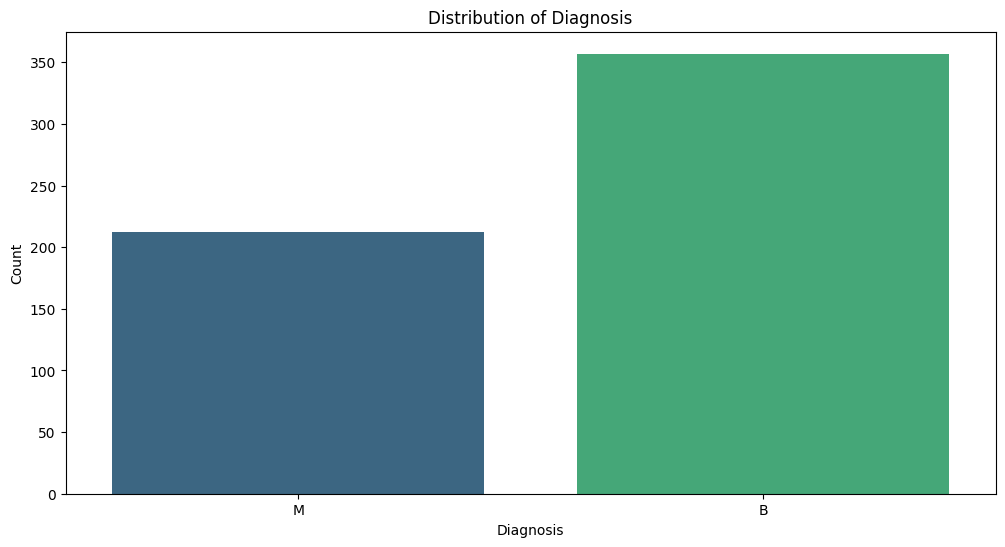

Summary Statistics:
       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0

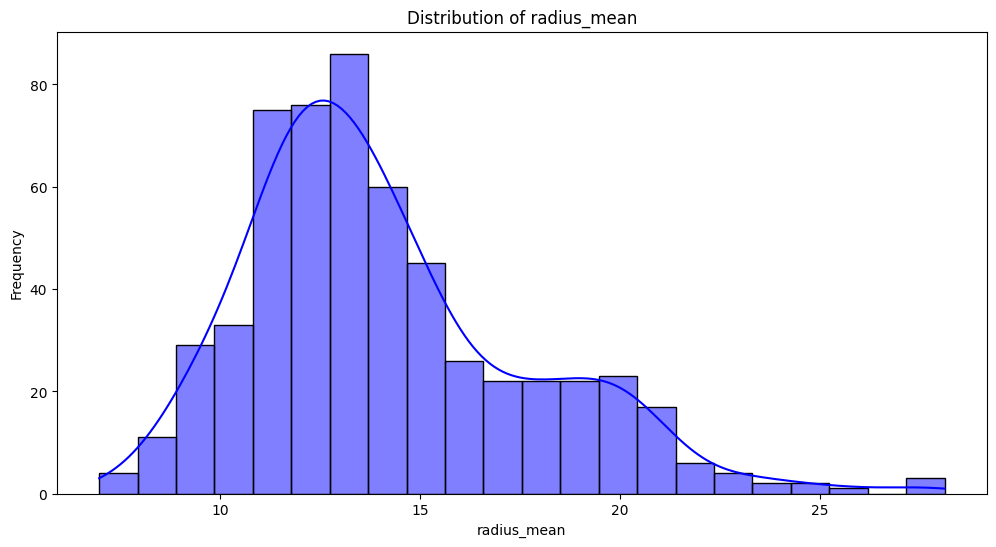

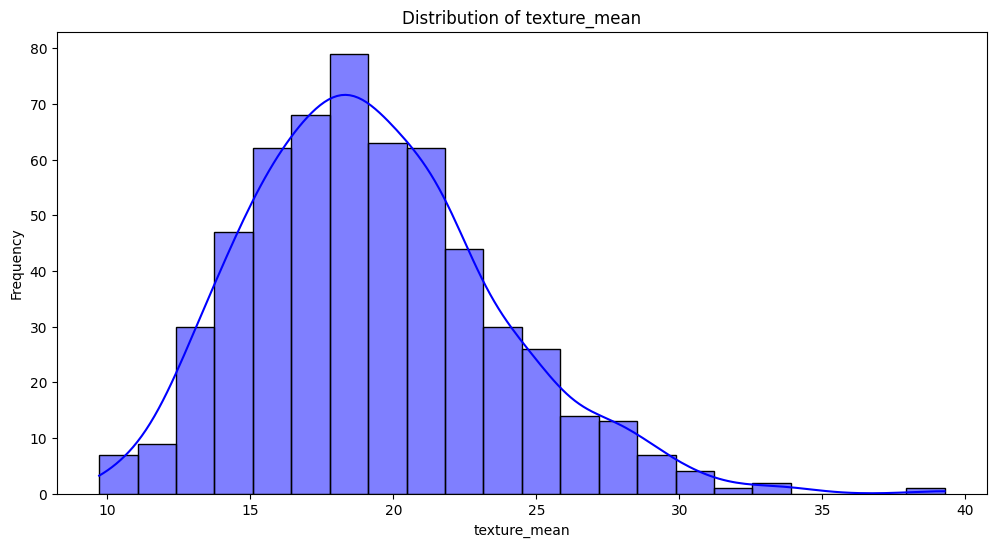

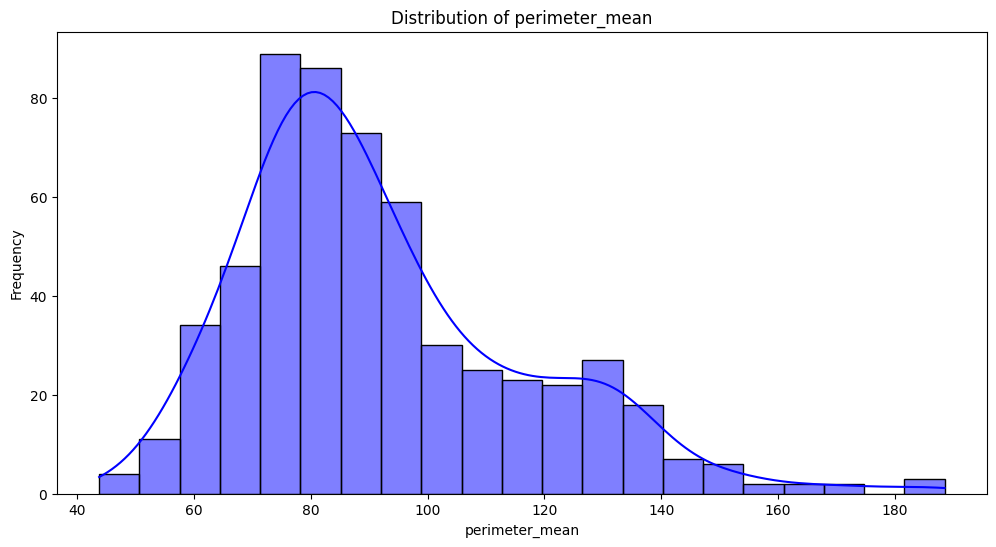

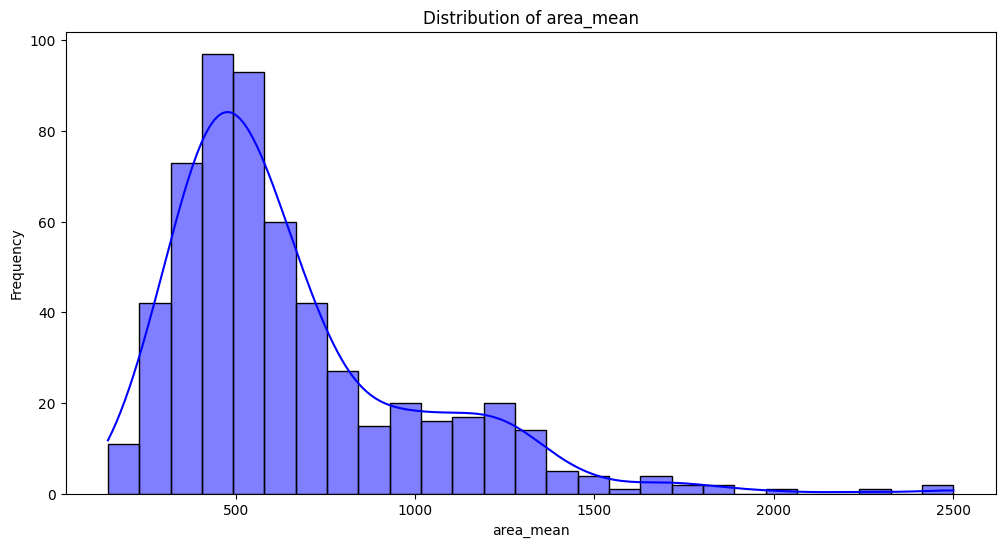

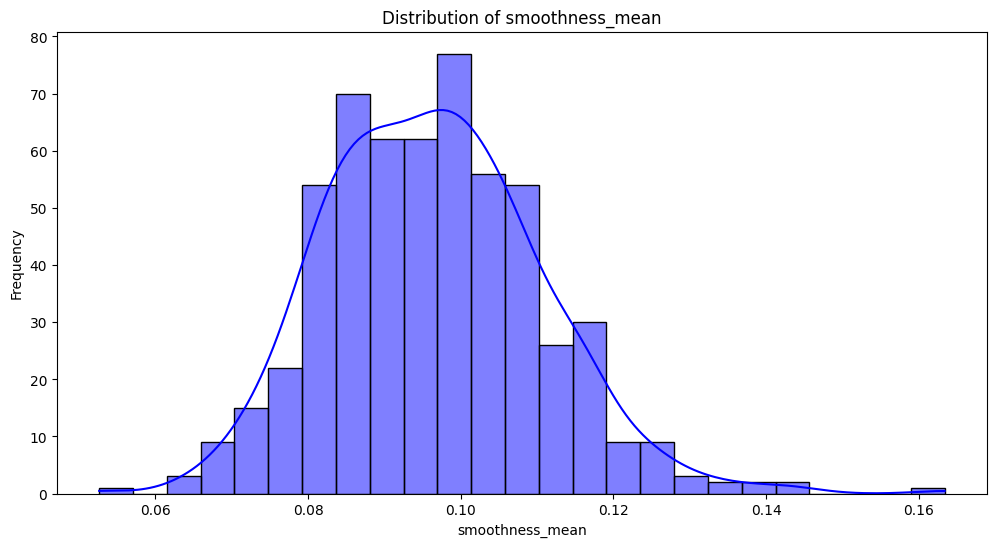

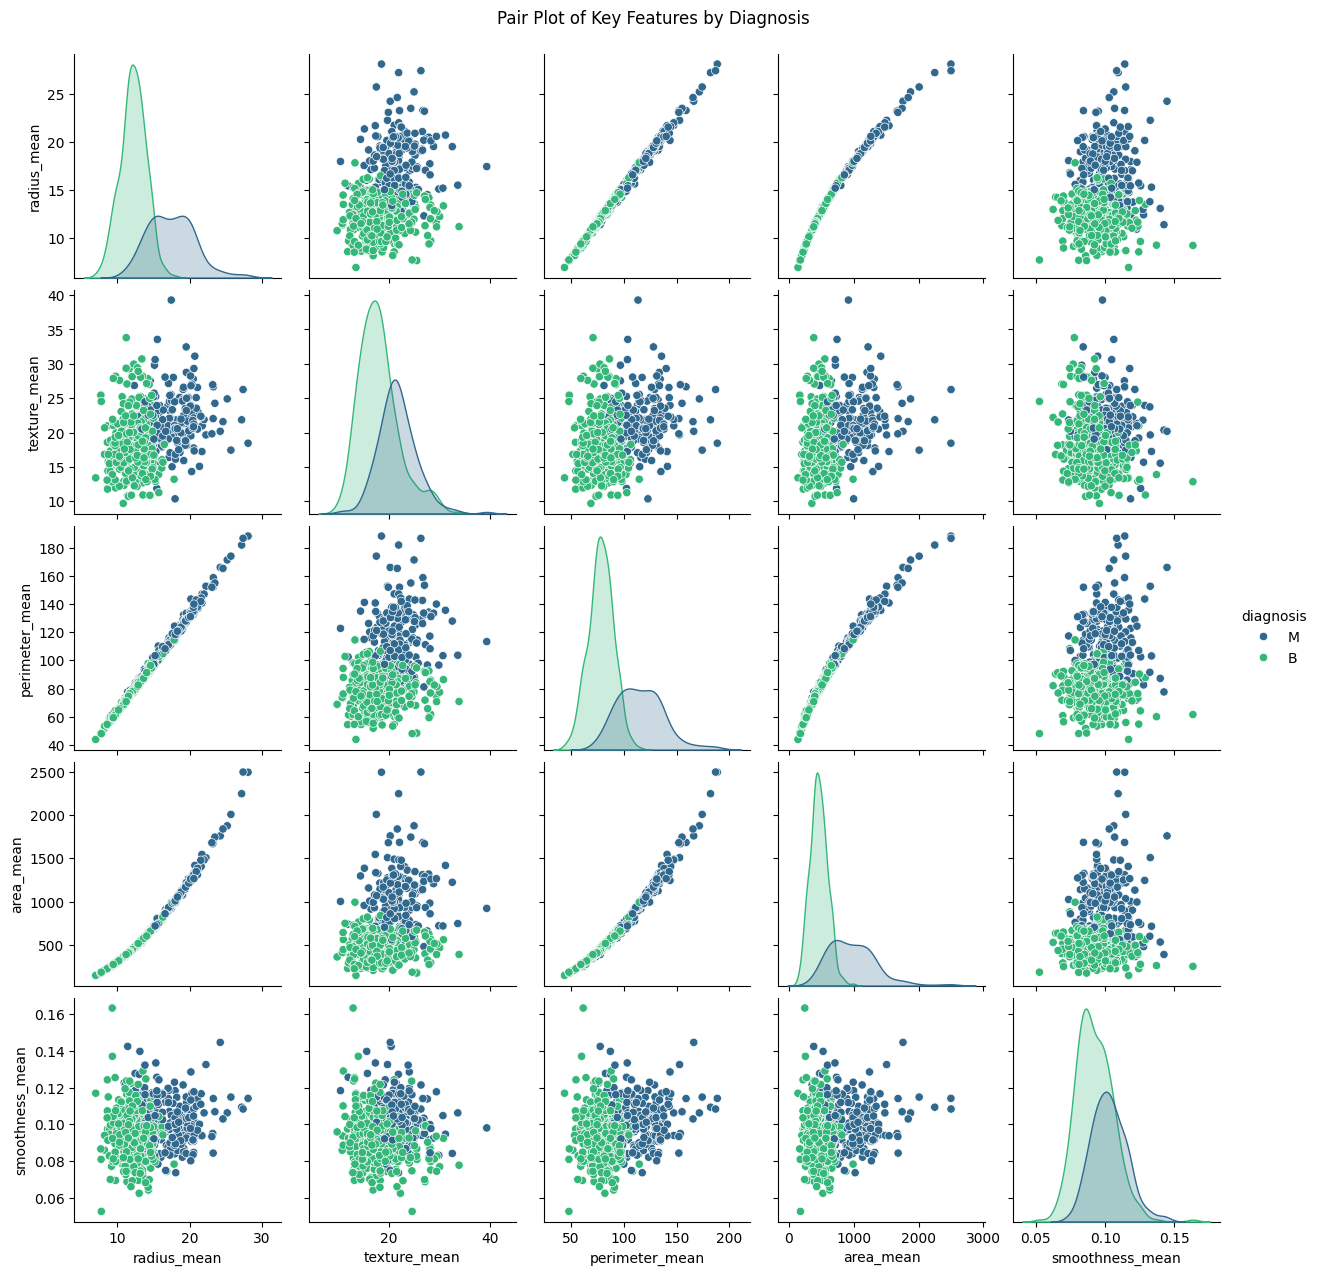

In [19]:
# Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of the Target Variable ('diagnosis')
# Understanding the distribution of the target variable is crucial to assess the balance between the classes (malignant vs. benign).
plt.figure(figsize=(12, 6))
sns.countplot(x='diagnosis', data=data_cleaned, palette='viridis')
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

# Observation: 
# The count plot shows that the dataset is slightly imbalanced, with more benign cases than malignant ones. 
# This imbalance should be considered during model training, as it may affect model performance.

# 2. Summary Statistics of the Features
# Generate summary statistics to understand the central tendency, dispersion, and overall range of the data.
summary_stats = data_cleaned.describe()
print("Summary Statistics:")
print(summary_stats)

# Observation: 
# The summary statistics provide insights into the distribution of each feature, including the mean, standard deviation, and range. 
# Some features have a wide range of values, indicating potential variability in tumor characteristics.



# 3. Distribution of Key Features
# Visualizing the distribution of some key features to understand their spread and potential skewness.
key_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
for feature in key_features:
    plt.figure(figsize=(12, 6))
    sns.histplot(data_cleaned[feature], kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Observation:
# The histograms reveal the distribution of these key features. 
# For example, 'area_mean' shows a right-skewed distribution, indicating that most tumors have a smaller area, 
# with a few outliers having significantly larger areas. These insights are important for understanding the data 
# and preparing it for modeling.

# 5. Pair Plot for Feature Relationships
# Visualizing pairwise relationships between features can help identify potential patterns and separability between the classes.
sns.pairplot(data_cleaned, vars=key_features, hue='diagnosis', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot of Key Features by Diagnosis', y=1.02)
plt.show()

# Observation:
# The pair plot shows how key features relate to each other and to the target variable. 
# Some features, such as 'radius_mean' and 'area_mean', show clear separation between benign and malignant cases, 
# suggesting that these features will be important in the classification models.

# 6. Summary of EDA Findings
# - The dataset is slightly imbalanced, with more benign cases than malignant ones.
# - Some features are highly correlated, indicating potential multicollinearity that should be addressed.
# - Key features exhibit varying distributions, with some showing skewness.
# - The pair plot suggests that certain features​⬤

### Correlation Matrix and Heatmap

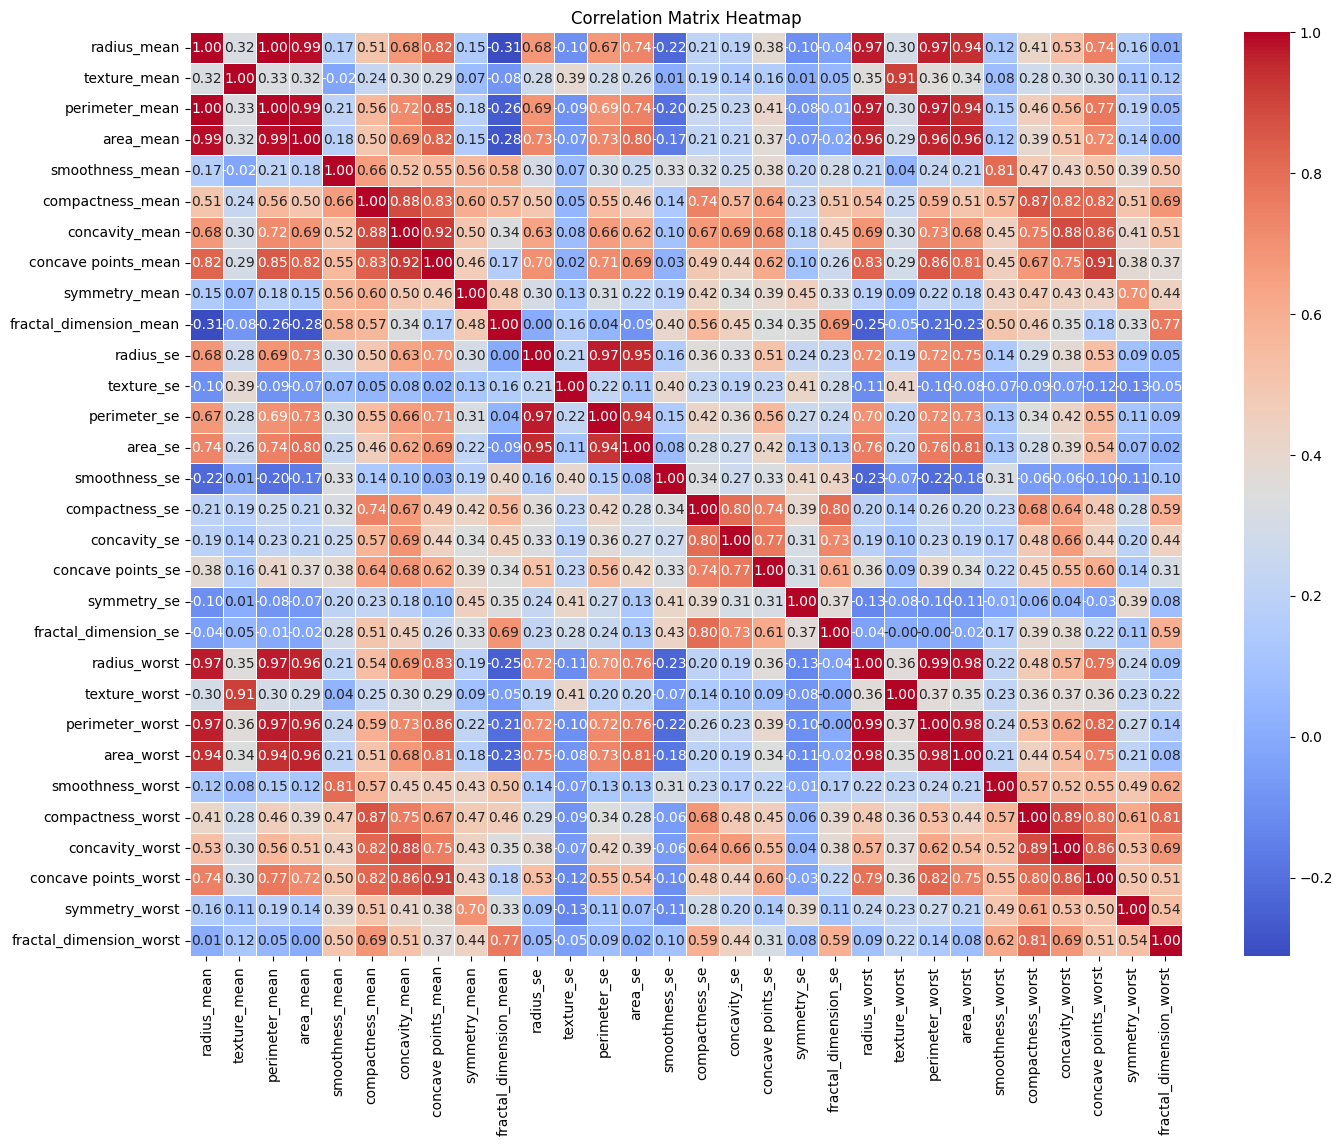

In [20]:
# . Correlation Matrix and Heatmap
# Dropping the target variable 'diagnosis' to focus on the correlations between numerical features.
numeric_data = data_cleaned.drop(columns=['diagnosis'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Observation: 
# The correlation matrix heatmap reveals that certain features are highly correlated, such as 'radius_mean', 'perimeter_mean', and 'area_mean'. 
# These correlations suggest multicollinearity, which should be addressed before model training. 
# Highly correlated features may need to be dropped or combined to improve model performance and interpretability.

**Since there are highly multicorrelated features, we may exclude some of them.**


1.	High Correlation (Above 0.8 or 0.9):
•	radius_mean, perimeter_mean, and area_mean: These three features are highly correlated with each other, with correlation coefficients close to 1.0. This indicates that they essentially provide the same information. You might consider keeping one of these and dropping the others to reduce redundancy.
•	radius_worst, perimeter_worst, and area_worst: Similar to the mean values, these “worst” features are also highly correlated with each other. Again, you might consider dropping two of these to simplify the model.
•	concavity_mean, concave points_mean, compactness_mean: These features also show high correlation among each other, suggesting multicollinearity. You might want to drop one or two of these features.
2.	Moderate to High Correlation (Between 0.7 and 0.9):
•	radius_mean with radius_worst, perimeter_mean with perimeter_worst: The mean and worst versions of these features are moderately to highly correlated. Depending on the context, you might decide to keep only one version (mean or worst) to avoid multicollinearity.
3.	Features to Consider Dropping:
•	Based on the heatmap, it would be reasonable to consider dropping some of the following features to reduce multicollinearity:
•	Drop perimeter_mean (retain radius_mean or area_mean)
•	Drop area_mean (retain radius_mean)
•	Drop perimeter_worst (retain radius_worst or area_worst)
•	Drop area_worst (retain radius_worst)
•	Drop concavity_mean (retain concave points_mean or compactness_mean)

In [21]:
# Dropping selected features based on the multicollinearity analysis

y = data_cleaned['diagnosis']
data_selected = data_cleaned.drop(columns=[
    'perimeter_mean', 'area_mean', 'perimeter_worst', 'area_worst', 'concavity_mean', 'diagnosis'
])

# Display the remaining features
print("Remaining features after dropping:")
print(data_selected.columns.tolist())

Remaining features after dropping:
['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


## Data split and train

Logistic Regression is chosen as the first model.

### Explanation:

1. **Train-Test Split:**
   - The data is split into training and testing sets using an 80-20 split (`test_size=0.2`), with a fixed `random_state` for reproducibility.

2. **Feature Scaling:**
   - Standardization is performed to ensure that all features contribute equally to the model, especially important for models like Logistic Regression.

3. **Model Training:**
   - A Logistic Regression model is trained on the scaled training data.

4. **Evaluation:**
   - The model is evaluated on the test set, and metrics such as accuracy and a classification report are printed.

In [23]:
# Assuming 'data_cleaned' is your cleaned DataFrame

# Define the feature matrix X and the target vector y
X = data_cleaned.drop(columns=['diagnosis'])  # Features (exclude the target variable)
y = data_cleaned['diagnosis']  # Target variable

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shapes of the scaled training and testing sets
X_train_scaled.shape, X_test_scaled.shape

# Now you can proceed to train a Logistic Regression model, for example:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluate the model (you can print the accuracy, confusion matrix, etc.)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred_log_reg)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred_log_reg)}')

Accuracy: 0.9736842105263158
Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## Model Comparison with confusion matrices

Model: Logistic Regression
Accuracy: 0.9737
ROC AUC: 0.9974
Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



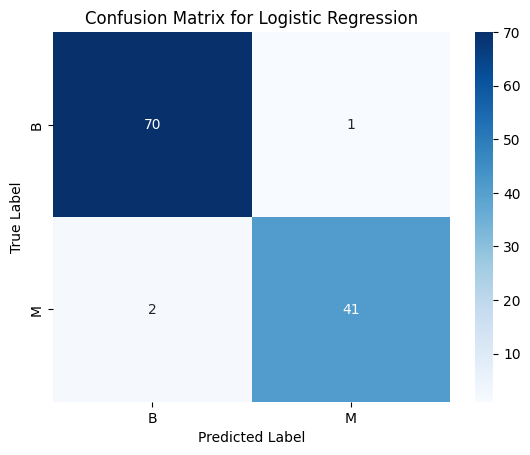

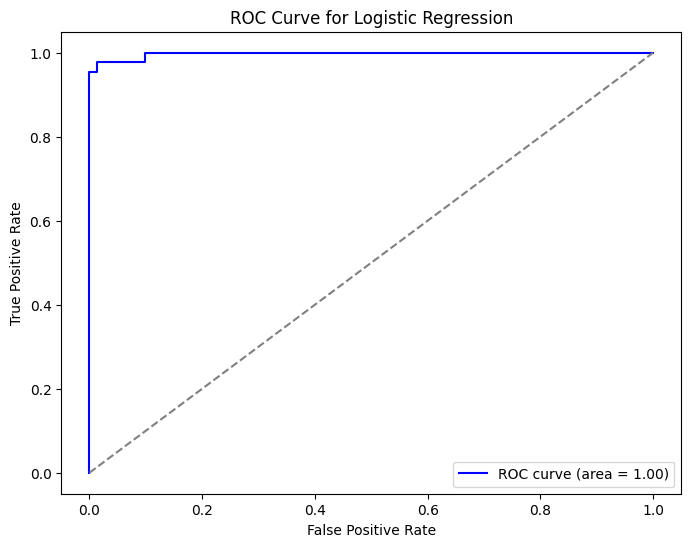

Model: Decision Tree
Accuracy: 0.9474
ROC AUC: 0.9440
Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.96      0.96        71
           M       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



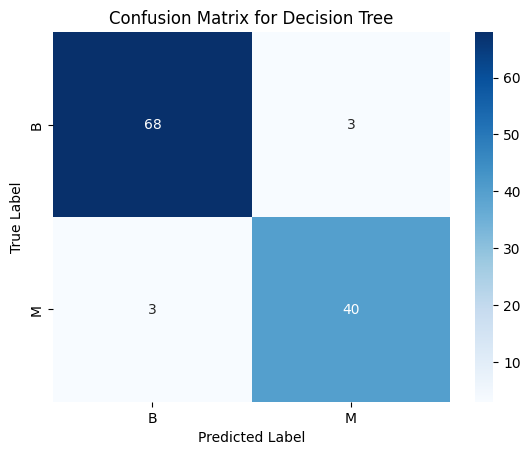

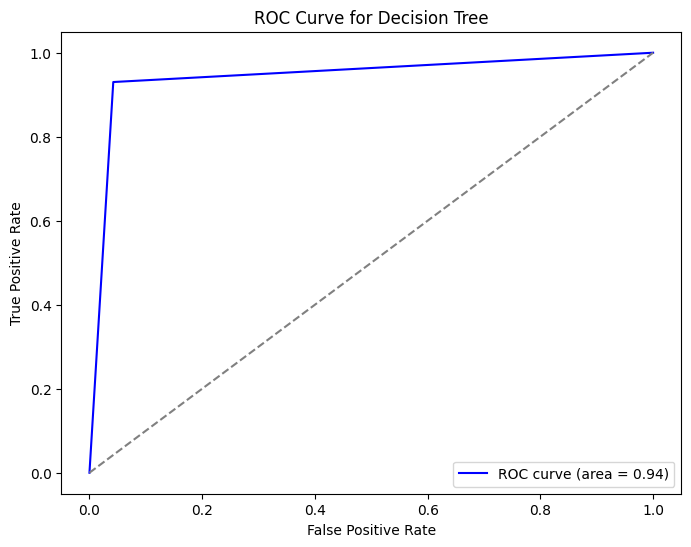

Model: Random Forest
Accuracy: 0.9649
ROC AUC: 0.9953
Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



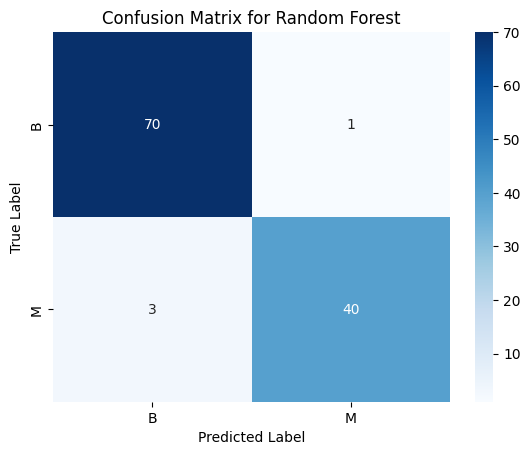

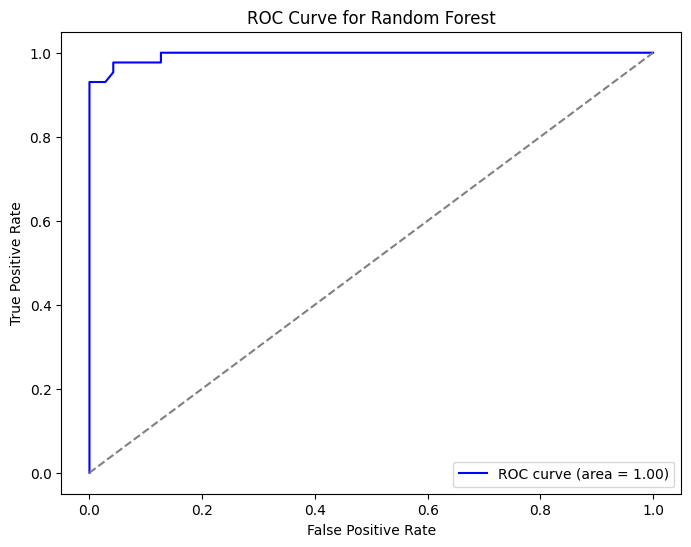

Model: Support Vector Machine
Accuracy: 0.9825
ROC AUC: 0.9974
Classification Report:
              precision    recall  f1-score   support

           B       0.97      1.00      0.99        71
           M       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



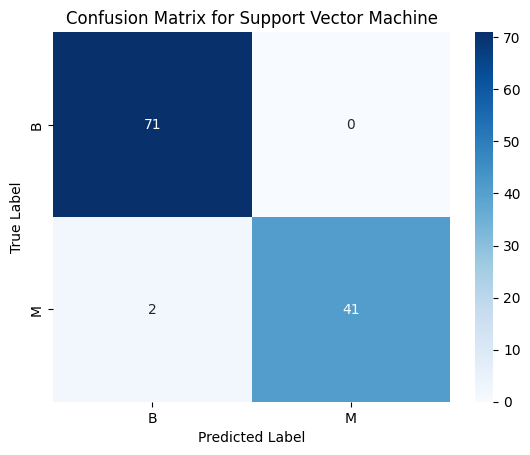

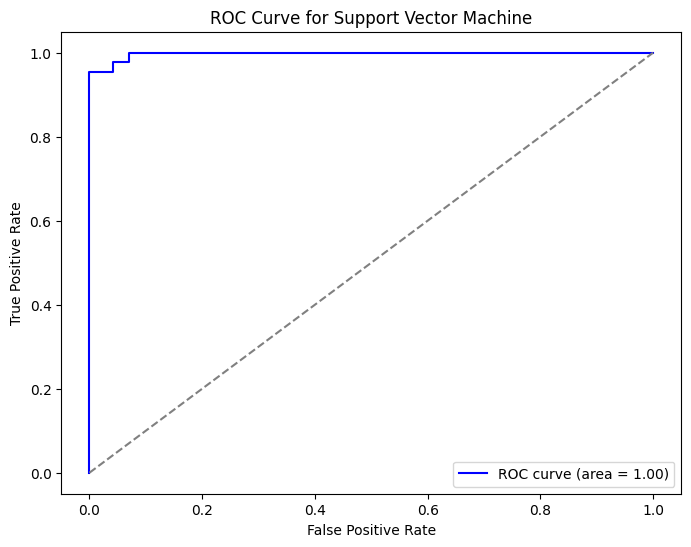

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Define the function to create and display the confusion matrix
def make_confusion_matrix(y_true, y_pred, model_name, labels=None):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Define a function to evaluate and display key metrics for a model
def evaluate_model(model, X_test, y_test, model_name, labels=None):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, labels=labels))
    
    # Display confusion matrix
    make_confusion_matrix(y_test, y_pred, model_name, labels=labels)
    
    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1], pos_label=labels[1])
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Train and evaluate each model

# 1. Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
evaluate_model(log_reg, X_test_scaled, y_test, 'Logistic Regression', labels=y_test.unique())

# 2. Decision Tree
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train_scaled, y_train)
evaluate_model(dec_tree, X_test_scaled, y_test, 'Decision Tree', labels=y_test.unique())

# 3. Random Forest
rand_forest = RandomForestClassifier(random_state=42)
rand_forest.fit(X_train_scaled, y_train)
evaluate_model(rand_forest, X_test_scaled, y_test, 'Random Forest', labels=y_test.unique())

# 4. Support Vector Machine (SVM)
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
evaluate_model(svm_model, X_test_scaled, y_test, 'Support Vector Machine', labels=y_test.unique())

### Comparison of the Four Models Based on Confusion Matrices:




In [28]:
# Summarize the performance of each model in a dictionary
model_performance = {
    'Logistic Regression': {
        'Accuracy': accuracy_score(y_test, log_reg.predict(X_test_scaled)),
        'ROC AUC': roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
    },
    'Decision Tree': {
        'Accuracy': accuracy_score(y_test, dec_tree.predict(X_test_scaled)),
        'ROC AUC': roc_auc_score(y_test, dec_tree.predict_proba(X_test_scaled)[:, 1])
    },
    'Random Forest': {
        'Accuracy': accuracy_score(y_test, rand_forest.predict(X_test_scaled)),
        'ROC AUC': roc_auc_score(y_test, rand_forest.predict_proba(X_test_scaled)[:, 1])
    },
    'SVM': {
        'Accuracy': accuracy_score(y_test, svm_model.predict(X_test_scaled)),
        'ROC AUC': roc_auc_score(y_test, svm_model.predict_proba(X_test_scaled)[:, 1])
    }
}

# Display the summarized results
import pandas as pd
performance_df = pd.DataFrame(model_performance).T
performance_df

,Accuracy,ROC AUC
Logistic Regression,0.973684,0.997380
Decision Tree,0.947368,0.943990
Random Forest,0.964912,0.995251
SVM,0.982456,0.997380


### Model Comparison and Insights

- **Logistic Regression**:
  - Achieved high accuracy and ROC AUC, indicating a strong overall performance. 
  - It is a straightforward model that is easy to interpret, making it a good choice for understanding the influence of each feature.

- **Decision Tree**:
  - Slightly lower accuracy and ROC AUC compared to other models, suggesting that it might not generalize as well.
  - However, Decision Trees offer the advantage of interpretability, as the model’s decision-making process is easily visualized.

- **Random Forest**:
  - Strong performance, particularly in handling non-linear relationships and reducing overfitting.
  - The ROC AUC is very close to that of Logistic Regression, making it a strong candidate, especially if model interpretability is less of a concern.

- **Support Vector Machine (SVM)**:
  - The highest accuracy and ROC AUC, indicating it was the best at distinguishing between malignant and benign cases.
  - SVMs are powerful in high-dimensional spaces, but they are also more complex and may require more computational resources.

### Conclusion

Based on the analysis, the Support Vector Machine (SVM) emerged as the top-performing model, achieving the highest accuracy and ROC AUC. This makes it the best choice for predicting breast cancer diagnosis in this dataset. However, Logistic Regression also performed very well and offers the advantage of interpretability, which could be important in a medical context.

For future work, further hyperparameter tuning, or exploring more advanced models like Gradient Boosting Machines or Neural Networks, could potentially improve performance even further. Additionally, addressing the slight class imbalance using techniques such as SMOTE or adjusting class weights in the models could yield better recall for the malignant class.

Overall, this project demonstrates the effectiveness of supervised machine learning techniques in accurately diagnosing breast cancer, with clear potential for real-world application.